In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [5]:
df=pd.read_csv("titanic.csv")
print("Number of records in the dataset : "+str(len(df.index)))
df.head()

Number of records in the dataset : 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
age_wrangled=df[pd.notnull(df['Age'])]
embark_wrangled=age_wrangled[pd.notnull(age_wrangled["Embarked"])]
print("Number of passengers in age wrangled " + str(len(age_wrangled.index)))
print("Number of passengers in age and embark wrangled " + str(len(embark_wrangled.index)))

Number of passengers in age wrangled 714
Number of passengers in age and embark wrangled 712


In [8]:
#Group data by gender
gender_data=embark_wrangled.groupby('Sex', as_index=False)
gender_mean_data=gender_data.mean()
print("Total survival Rate:" +str(embark_wrangled["Survived"].mean()))
print("\nMean Data by Gender")
print(gender_mean_data[["Sex","Survived","Age","Pclass","SibSp","Parch","Fare"]])

Total survival Rate:0.4044943820224719

Mean Data by Gender
      Sex  Survived        Age    Pclass     SibSp     Parch       Fare
0  female  0.752896  27.745174  2.073359  0.644788  0.714286  47.332433
1    male  0.205298  30.726645  2.335541  0.439294  0.271523  27.268836


In [9]:
total_df=gender_data["PassengerId"].count()
print(total_df)
total_df.columns=["Sex","Total"]
gender_list=total_df["Sex"]
del total_df["Sex"]
gender_survived_df=gender_data["Survived"].sum()
del gender_survived_df["Sex"]
combined_df=total_df.add(gender_survived_df,fill_value=0)
print(combined_df)

      Sex  PassengerId
0  female          259
1    male          453
   Survived  Total
0     195.0  259.0
1      93.0  453.0


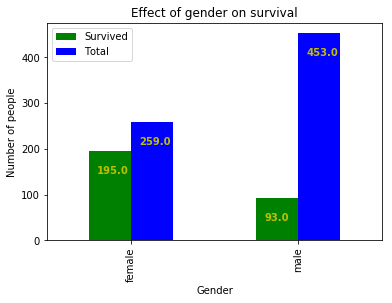

In [10]:
combined_df.plot.bar(color=["green","blue"])
plt.title("Effect of gender on survival")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.xticks(range(len(gender_list)),gender_list)
survival_gender_list=[combined_df.loc[0]["Survived"],combined_df.loc[1]["Survived"]]
total_gender_list=[combined_df.loc[0]["Total"],combined_df.loc[1]["Total"]]

#Define function to create value labels on plots
def create_value_labels(list_data,decimals,x_adjust,y_adjust):
    for x,y in enumerate(list_data):
        plt.text(x + x_adjust, y + y_adjust, round(list_data[x],decimals),color="y", fontweight="bold")
        
create_value_labels(survival_gender_list, 1,-0.2,-50)
create_value_labels(total_gender_list,1,0.05,-50)
plt.show()

In [11]:
#Effect of age on survival
survivor_data = embark_wrangled.groupby("Survived", as_index=False)
survivor_mean_data=survivor_data.mean()
print(survivor_mean_data)

   Survived  PassengerId    Pclass        Age     SibSp     Parch       Fare
0         0   442.299528  2.485849  30.626179  0.525943  0.365566  22.965456
1         1   457.850694  1.878472  28.193299  0.496528  0.531250  51.647672


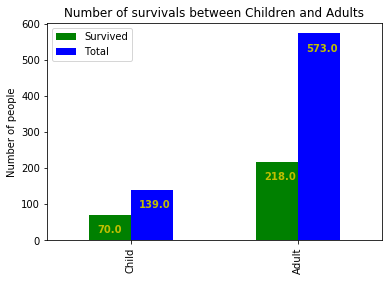

In [18]:
#Split data into children and adult
child_data=embark_wrangled[embark_wrangled['Age']<=18]
adult_data=embark_wrangled[embark_wrangled['Age']>18]

#Count number of total and survived children and adult
child_count=child_data['PassengerId'].count()
adult_count=adult_data['PassengerId'].count()
survived_child_count=child_data["Survived"].sum()
survived_adult_count=adult_data["Survived"].sum()

#Put into lists
child_list=[survived_child_count,child_count]
adult_list=[survived_adult_count,adult_count]
total_list=[child_count,adult_count]
survived_list=[survived_child_count,survived_adult_count]

#Create pandas dataframe for above counts
counts_df=pd.DataFrame([child_list,adult_list], columns=["Survived","Total"], index=["Child","Adult"])

#Create plot
counts_df.plot.bar(color=["green","blue"])
plt.title("Number of survivals between Children and Adults")
plt.ylabel("Number of people")
plt.xticks(range(len(counts_df.index)),counts_df.index)
create_value_labels(survived_list,1,-0.2,-50)
create_value_labels(total_list,1,0.05,-50)
plt.show()


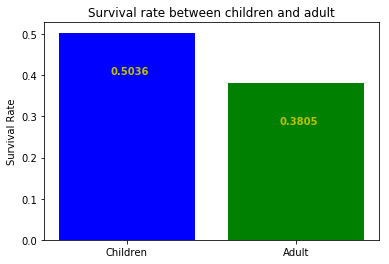

In [22]:
#Create list with survival rates with children and adult
survival_rate_count=[child_data.mean()["Survived"],adult_data.mean()["Survived"]]
plt.bar(range(len(survival_rate_count)),survival_rate_count, align="center", color=["blue","green"])
plt.title("Survival rate between children and adult")
plt.ylabel("Survival Rate")
plt.xticks(range(len(survival_rate_count)),["Children","Adult"])

#Add value labels for each category
create_value_labels(survival_rate_count,4,-0.1,-0.1)
plt.show()

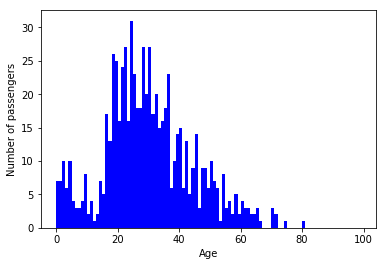

In [23]:
#Age distribution of all passengers
embark_wrangled["Age"].plot.hist(bins=range(100),color="blue")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

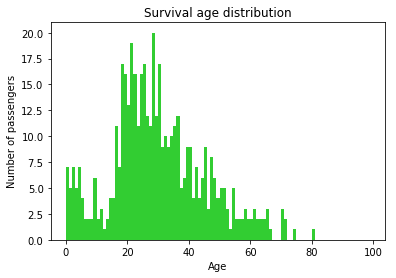

In [25]:
#Survivor age distribution
survivor_data["Age"].plot.hist(bins=range(100),color="limegreen",label="Survived")
plt.title("Survival age distribution")
plt.ylabel("Number of passengers")
plt.xlabel("Age")
survivor_stats=survivor_data["Age"].describe()
plt.show()

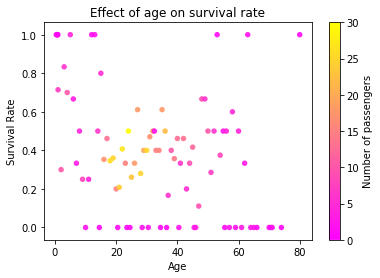

In [30]:
#Effect of age on survival rate
age_data=embark_wrangled.groupby("Age",as_index=False)
age_mean_data=age_data.mean()

#Create list of all age
age_list=age_mean_data["Age"].tolist()

#Determine number of passengers in age group
same_passengers=age_data.count()["PassengerId"]

#Plot survival rates by age
scatter_plot1=plt.scatter(age_mean_data["Age"],age_mean_data["Survived"],\
                          s=30,alpha=0.9,c=same_passengers,cmap="spring",edgecolors="none",vmin=0,vmax=30)
plt.title("Effect of age on survival rate")
plt.colorbar(scatter_plot1,label="Number of passengers")
plt.ylabel("Survival Rate")
plt.xlabel("Age")
plt.show()

In [32]:
count_age=age_data["PassengerId"].count()

#Get dataframe of ages that are greater than 5 passengers
count_age_gt5=count_age[count_age>5]

#Create list that stores all ages of passengers that more than 5
age_gt5_list=count_age_gt5["Age"].values.tolist()

age_gt5_df=embark_wrangled[embark_wrangled["Age"].isin(age_gt5_list)]
print(age_gt5_df["PassengerId"].count())

668


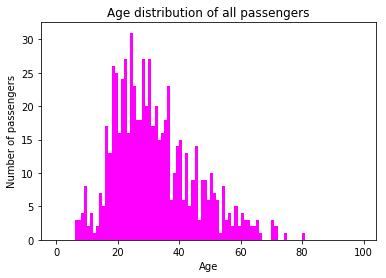

In [33]:
#Age distribution of all passengers
age_gt5_df["Age"].plot.hist(bins=range(100),color="magenta")
plt.title("Age distribution of all passengers")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

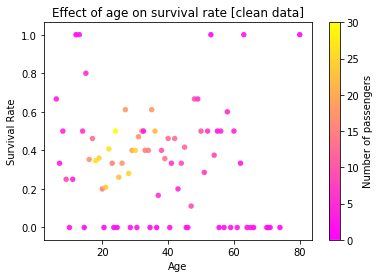

In [37]:
#Effect of age on survival rate
age_gt5_data=age_gt5_df.groupby("Age",as_index=False)
age_gt5_mean_data=age_gt5_data.mean()

#Determine number of passengers in age group and put into new list
same_passengers_gt5=age_gt5_data.count()["PassengerId"]

#Re-plot
scatter_plot2=plt.scatter(age_gt5_mean_data["Age"],age_gt5_mean_data["Survived"],s=30,alpha=0.9,c=same_passengers_gt5,cmap="spring",edgecolors="none",vmin=0,vmax=30)
plt.title("Effect of age on survival rate [clean data]")
plt.colorbar(scatter_plot2,label="Number of passengers")
plt.ylabel("Survival Rate")
plt.xlabel("Age")
plt.show()